In [1]:
# small hack to change directory to root
import os
if '_initialized' not in locals():
    os.chdir("..")
    _initialized = True

In [2]:
import json
import quaternion
from atlasrl.motions.MotionState import MotionState
from atlasrl.motions.MotionReader import MotionReader
import numpy as np

pybullet build time: Sep  3 2021 23:57:45


In [3]:
q = quaternion.one

In [4]:
reader = MotionReader.readClip()

In [5]:
reader.getState(0.5)

MotionState(deltaTime=0.033332, rootPosition=array([0.47689506, 0.86407808, 0.00933066]), rootRotation=quaternion(0.997249711442598, -0.025917629364114, -0.0484208612438888, -0.0497737228583148), chestRotation=quaternion(0.999712013850751, 0.0204272118836323, -0.0125936415879724, 0.00093242073596355), neckRotation=quaternion(1, 0, 0, 0), rightHipRotation=quaternion(0.996834766268045, 0.0439087148139275, -0.0556621998533234, -0.0359722996481262), rightKneeRotation=-0.20584635977439086, rightAnkleRotation=quaternion(0.984969174510147, -0.0350317268378785, 0.081912528528442, 0.147982420651885), rightShoulderRotation=quaternion(0.940811970400139, -0.197612980418163, 0.233729904783935, 0.145573265208676), rightElbowRotation=0.5620822617304692, leftHipRotation=quaternion(0.953974339646289, 0.0617495877658028, 0.112579717952824, 0.271008166204338), leftKneeRotation=-0.23681423544941896, leftAnkleRotation=quaternion(0.998854076097293, 0.0337373310077609, -0.0318516330352972, -0.011722429008373

In [6]:
state1 = reader.frames[0]
state2 = reader.frames[1]
alpha = 0.5

In [7]:
times = np.arange(0, 10, 0.03)
for t in times[::40]:
    print(reader.getState(t).rootRotation)

quaternion(0.998678, 0.014104, -0.000698, -0.049423)
quaternion(0.99638515349731, 0.0276426254369164, 0.0627621580982147, -0.0501219282669928)
quaternion(0.997248614700431, 0.0259200209419236, 0.0484393339597785, -0.0497764697087277)
quaternion(0.998277244108765, 0.0178147674472353, 0.0366096373547063, -0.0422608606742355)
quaternion(0.998954595171636, 0.0165916829149663, 0.0274146985299469, -0.0325991312419272)
quaternion(0.99919390681529, 0.0233575110885121, 0.0108970766773824, -0.0307901040773007)
quaternion(0.998905326642205, 0.0322382757583434, -0.00506281183463282, -0.0335203064648833)
quaternion(0.998161652129816, 0.03997624586156, -0.0125837909841734, -0.04378836779315)
quaternion(0.998124155247179, 0.0353926492143726, -0.00158433580949628, -0.049921168891902)


In [8]:
quaternion.rotate_vectors(quaternion.from_euler_angles([1, 0, 0]), np.array([0, 1, 0]))

array([-0.84147098,  0.54030231,  0.        ])

<IPython.core.display.Javascript object>


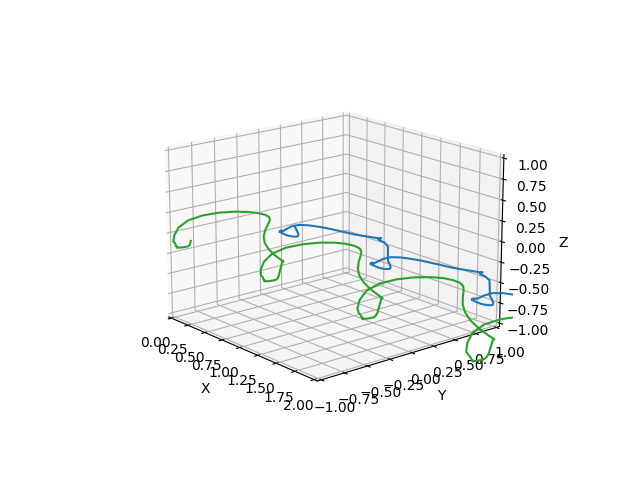

In [17]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

legVec = np.array([0, -1, 0])

def gen():
    for t in times:
        s = reader.getState(t)
        rootRot = s.rootRotation
        rootRot = quaternion.one
        rootRotRight = quaternion.one
        rootPos = s.rootPosition
        vec1 = quaternion.rotate_vectors(rootRot * s.rightHipRotation * rootRotRight, legVec)
        vec2 = quaternion.rotate_vectors(rootRot * quaternion.from_euler_angles([s.rightKneeRotation, 0, 0]) * rootRotRight, legVec)
        yield rootPos + vec1, rootPos + vec1 + vec2, rootPos

dataTotal = list(gen())
data = np.array([v1 for v1, v2, v3 in dataTotal]).T
data2 = np.array([v2 for v1, v2, v3 in dataTotal]).T
dataRoot = np.array([v3 for v1, v2, v3 in dataTotal]).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])
line2, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))
line3, = ax.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1])
line4, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))

def update(num, data, data2, dataRoot, line, line2, line3, line4):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    line2.set_data(np.array([dataRoot[0, num], data[0, num]]), np.array([dataRoot[1, num], data[1, num]]))
    line2.set_3d_properties(np.array([dataRoot[2, num], data[2, num]]))
    line3.set_data(data2[:2, :num])
    line3.set_3d_properties(data2[2, :num])
    line4.set_data(np.array([data[0, num], data2[0, num]]), np.array([data[1, num], data2[1, num]]))
    line4.set_3d_properties(np.array([data[2, num], data2[2, num]]))

# Setting the axes properties
ax.set_xlim3d([0.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, len(times), fargs=(data, data2, dataRoot, line, line2, line3, line4), interval=100, blit=False)
# ani.save('rightLeg.gif', writer='imagemagick')
plt.show()


In [10]:
-1 % 2

1

<IPython.core.display.Javascript object>


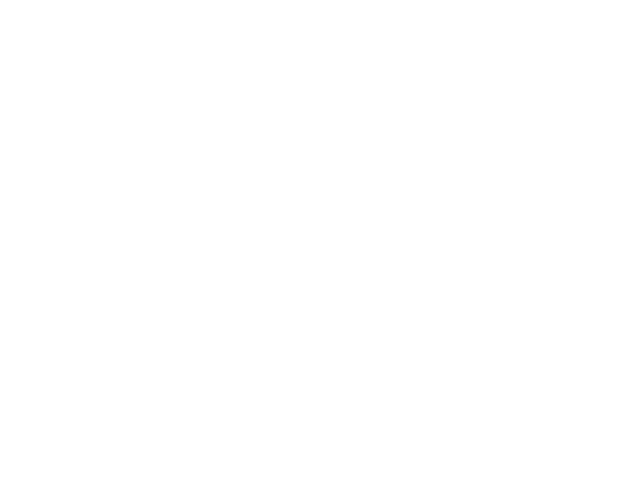

/home/tjacob/git/atlas-reinforcement-learning/env/lib/python3.7/site-packages/matplotlib/animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

legVec = np.array([0, -1, 0])

def gen():
    for t in times:
        s = reader.getState(t)
        rootRot = s.rootRotation
        rootRotRight = quaternion.one
        rootPos = s.rootPosition
        rootPos = np.zeros(3)
        vec1 = quaternion.rotate_vectors(rootRot * s.leftHipRotation * rootRotRight, legVec)
        vec2 = quaternion.rotate_vectors(rootRot * quaternion.from_euler_angles([s.leftKneeRotation, 0, 0]) * rootRotRight, legVec)
        yield rootPos + vec1, rootPos + vec1 + vec2, rootPos

dataTotal = list(gen())
data = np.array([v1 for v1, v2, v3 in dataTotal]).T
data2 = np.array([v2 for v1, v2, v3 in dataTotal]).T
dataRoot = np.array([v3 for v1, v2, v3 in dataTotal]).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])
line2, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))
line3, = ax.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1])
line4, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))

def update(num, data, data2, dataRoot, line, line2, line3, line4):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    line2.set_data(np.array([dataRoot[0, num], data[0, num]]), np.array([dataRoot[1, num], data[1, num]]))
    line2.set_3d_properties(np.array([dataRoot[2, num], data[2, num]]))
    line3.set_data(data2[:2, :num])
    line3.set_3d_properties(data2[2, :num])
    line4.set_data(np.array([data[0, num], data2[0, num]]), np.array([data[1, num], data2[1, num]]))
    line4.set_3d_properties(np.array([data[2, num], data2[2, num]]))

# Setting the axes properties
ax.set_xlim3d([0.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, len(times), fargs=(data, data2, dataRoot, line, line2, line3, line4), interval=100, blit=False)
# ani.save('leftLeg.gif', writer='imagemagick')
plt.show()


<IPython.core.display.Javascript object>


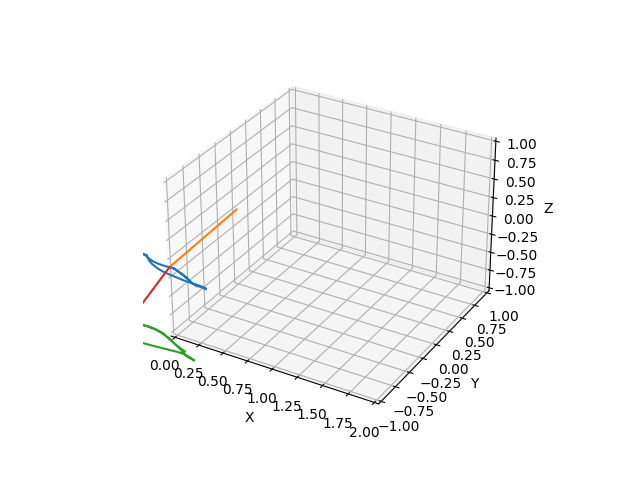

/home/tjacob/git/atlas-reinforcement-learning/env/lib/python3.7/site-packages/matplotlib/animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


In [12]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

legVec = np.array([0, -1, 0])

def gen():
    for t in times:
        s = reader.getState(t)
        rootRot = s.rootRotation
        rootRotRight = quaternion.one
        rootPos = s.rootPosition
        rootPos = np.zeros(3)
        vec1 = quaternion.rotate_vectors(rootRot * s.leftShoulderRotation * rootRotRight, legVec)
        vec2 = quaternion.rotate_vectors(rootRot * quaternion.from_euler_angles([s.leftElbowRotation, 0, 0]) * rootRotRight, legVec)
        yield rootPos + vec1, rootPos + vec1 + vec2, rootPos

dataTotal = list(gen())
data = np.array([v1 for v1, v2, v3 in dataTotal]).T
data2 = np.array([v2 for v1, v2, v3 in dataTotal]).T
dataRoot = np.array([v3 for v1, v2, v3 in dataTotal]).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])
line2, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))
line3, = ax.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1])
line4, = ax.plot(np.zeros(2), np.zeros(2), np.zeros(2))

def update(num, data, data2, dataRoot, line, line2, line3, line4):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    line2.set_data(np.array([dataRoot[0, num], data[0, num]]), np.array([dataRoot[1, num], data[1, num]]))
    line2.set_3d_properties(np.array([dataRoot[2, num], data[2, num]]))
    line3.set_data(data2[:2, :num])
    line3.set_3d_properties(data2[2, :num])
    line4.set_data(np.array([data[0, num], data2[0, num]]), np.array([data[1, num], data2[1, num]]))
    line4.set_3d_properties(np.array([data[2, num], data2[2, num]]))

# Setting the axes properties
ax.set_xlim3d([0.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, len(times), fargs=(data, data2, dataRoot, line, line2, line3, line4), interval=100, blit=False)
# ani.save('leftLeg.gif', writer='imagemagick')
plt.show()


In [13]:
np.log(quaternion.one)

quaternion(0, 0, 0, 0)

In [14]:
np.exp(np.log(quaternion.one))

quaternion(1, 0, 0, 0)

In [15]:
quaternion.as_rotation_vector(quaternion.one)

array([0., 0., 0.])

In [16]:
quaternion.as_float_array(quaternion.one)

array([1., 0., 0., 0.])